## Geometric Image Transformations
1) Resampling
2) Translation
3) Rotation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

### Image Loading

In [2]:
Img = Image.open("Images/Rocket_Image.jpg")
Img_Gray = Img.convert("L")
Img_Binary = Img.convert("1")

### Translation
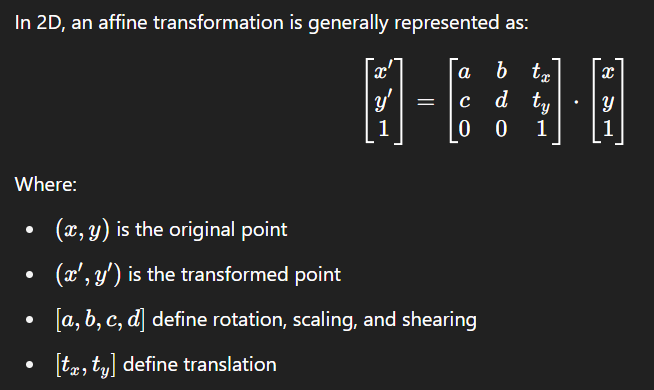

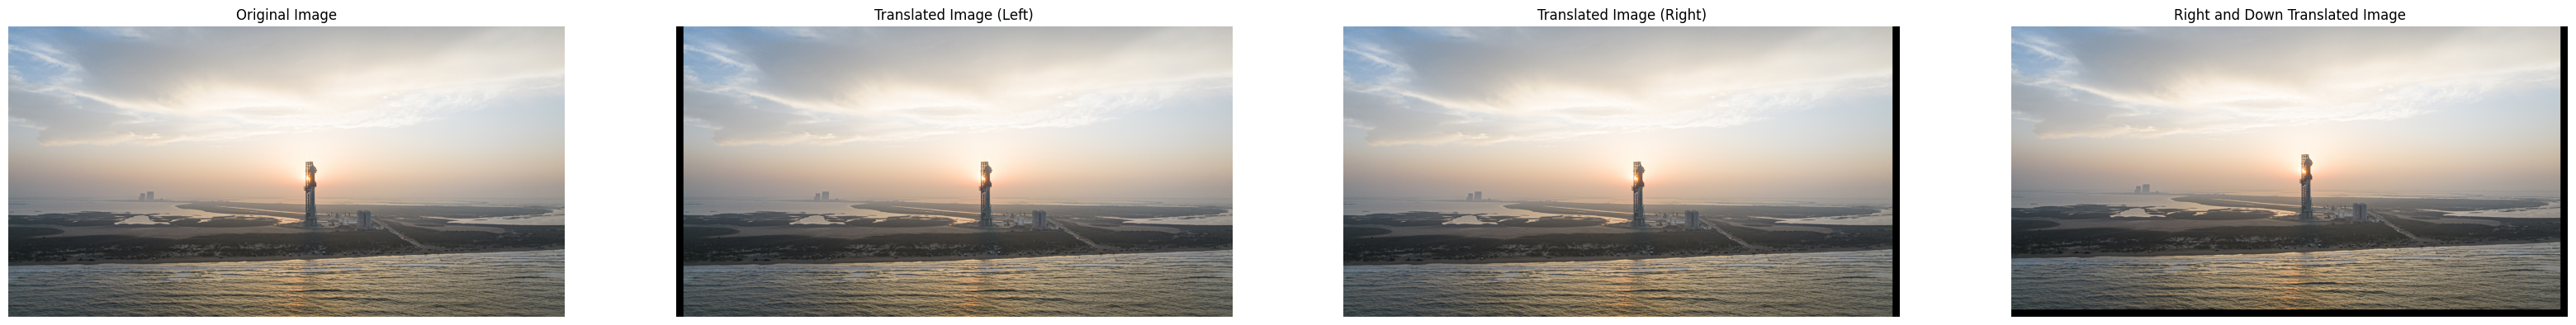

In [ ]:
# Affine Transformation for translation
def translate_image(image, tx, ty):
    """
    Translate the image by tx and ty pixels.
    """
    translation_matrix = (1, 0, tx, 0, 1, ty)
    translated_image = image.transform(image.size, Image.AFFINE, translation_matrix)
    return translated_image

# Example usage
plt.figure(figsize=(40, 20))
plt.subplot(1, 4, 1)
plt.imshow(Img)
plt.title("Original Image")
plt.axis('off')
# Left Translation
plt.subplot(1, 4, 2)
translated_img_left = translate_image(Img, -50, 0)
plt.imshow(translated_img_left)
plt.title("Translated Image (Left)")
plt.axis('off')
# Right Translation
plt.subplot(1, 4, 3)
translated_img_right = translate_image(Img, 50, 0)
plt.imshow(translated_img_right)
plt.title("Translated Image (Right)")
plt.axis('off')
# Multiple translations
plt.subplot(1, 4, 4)
translated_img = translate_image(Img, 50, 50)
plt.imshow(translated_img)
plt.title("Right and Down Translated Image")
plt.axis('off')
plt.show()

### Rotation

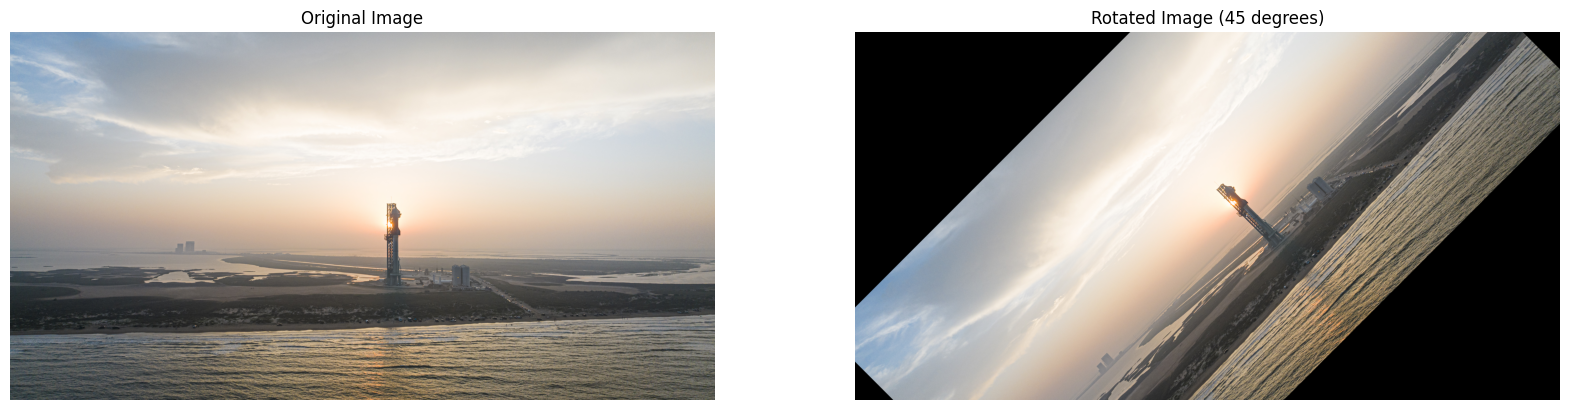

In [ ]:
# Transformation function for rotation
def rotate_image(image, angle):
    """
    Rotate the image by a given angle.
    """
    rotated_image = image.rotate(angle)
    return rotated_image
# Example usage
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(Img)
plt.title("Original Image")
plt.axis('off')
# Rotate 45 degrees
plt.subplot(1, 2, 2)
rotated_img = rotate_image(Img, 45)
plt.imshow(rotated_img)
plt.title("Rotated Image (45 degrees)")
plt.axis('off')
plt.show()

### Scaling

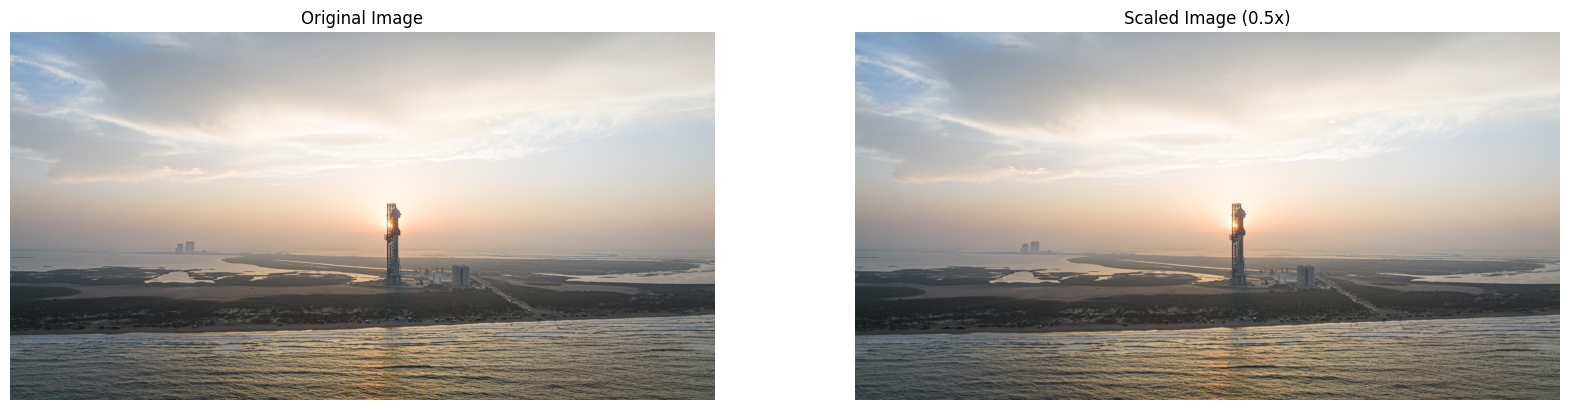

In [16]:
# Transformation function for scaling
def scale_image(image, scale_factor):
    """
    Scale the image by a given factor.
    """
    new_size = (int(image.width * scale_factor), int(image.height * scale_factor))
    scaled_image = image.resize(new_size, Image.BILINEAR)
    return scaled_image

# Example usage
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(Img)
plt.title("Original Image")
plt.axis('off')
# Scale by a factor of 0.5
plt.subplot(1, 2, 2)
scaled_img = scale_image(Img, 0.5)
plt.imshow(scaled_img)
plt.title("Scaled Image (0.5x)")
plt.axis('off')
plt.show()

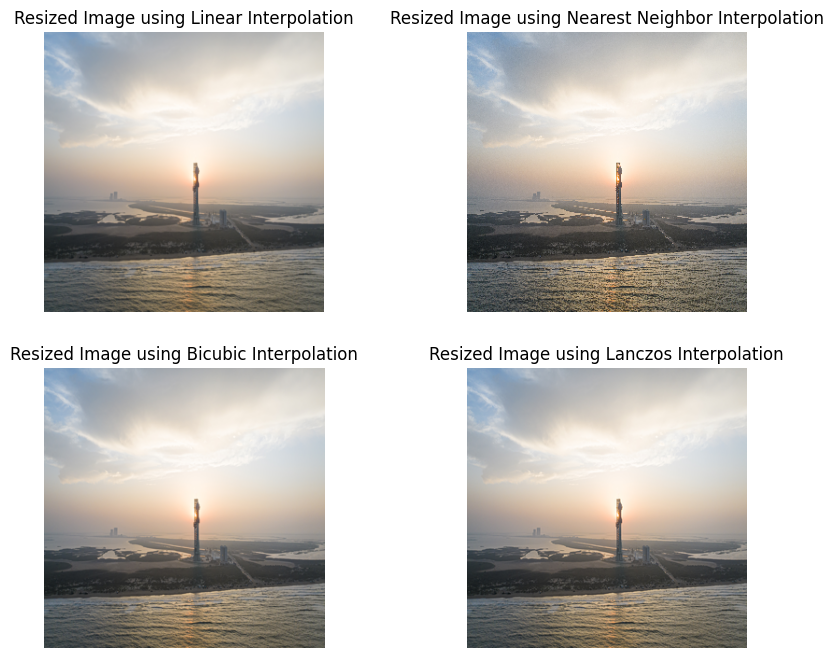

In [17]:
# Resizing image using Linear Neighborhood Interpolation using PIL
resized_img_linear = Img.resize((300, 300), Image.BILINEAR)
# Resizing image using Nearest Neighbor Interpolation using PIL
resized_img_nearest = Img.resize((300, 300), Image.NEAREST)
# Resizing image using Bicubic Interpolation using PIL
resized_img_bicubic = Img.resize((300, 300), Image.BICUBIC)
# Resizing image using Lanczos Interpolation using PIL
resized_img_lanczos = Img.resize((300, 300), Image.LANCZOS)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(resized_img_linear)
plt.title("Resized Image using Linear Interpolation")
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(resized_img_nearest)
plt.title("Resized Image using Nearest Neighbor Interpolation")
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(resized_img_bicubic)
plt.title("Resized Image using Bicubic Interpolation")
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(resized_img_lanczos)
plt.title("Resized Image using Lanczos Interpolation")
plt.axis('off')
plt.show()

## Manual Implementation of the Transformation Operations

### Manual Implementation of Image Translation

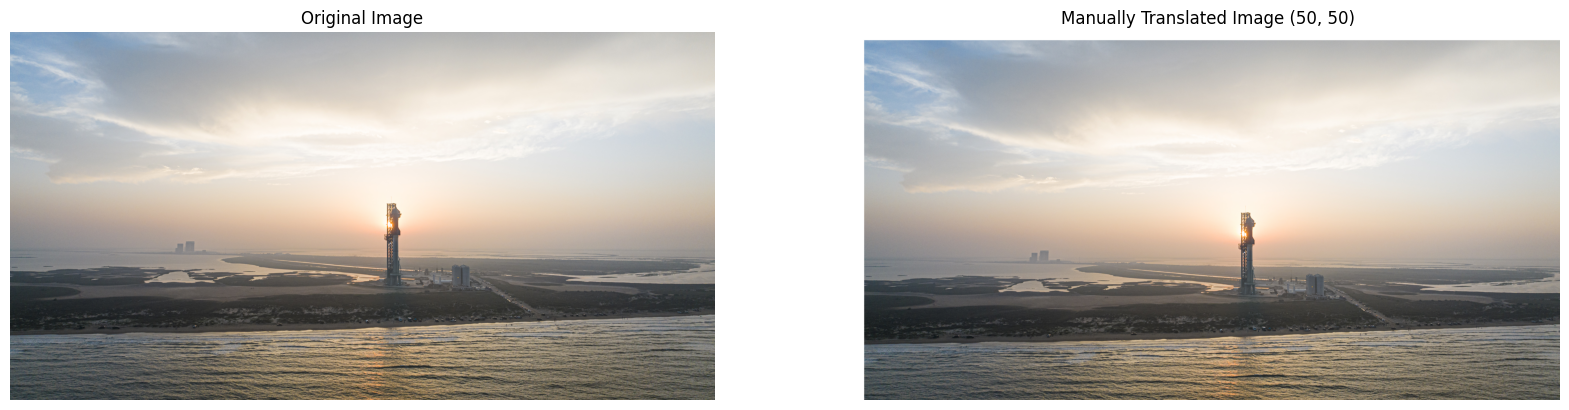

In [18]:
def manual_translation(image, tx, ty):
    """
    Manually translate the image by tx and ty pixels.
    """
    width, height = image.size
    translated_image = Image.new("RGB", (width, height), (255, 255, 255))
    
    for x in range(width):
        for y in range(height):
            new_x = x + tx
            new_y = y + ty
            
            if 0 <= new_x < width and 0 <= new_y < height:
                translated_image.putpixel((new_x, new_y), image.getpixel((x, y)))
    
    return translated_image

# Example usage of manual translation
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(Img)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(manual_translation(Img, 50, 50))
plt.title("Manually Translated Image (50, 50)")
plt.axis('off')
plt.show()


### Manual Implementation of Image Rotation

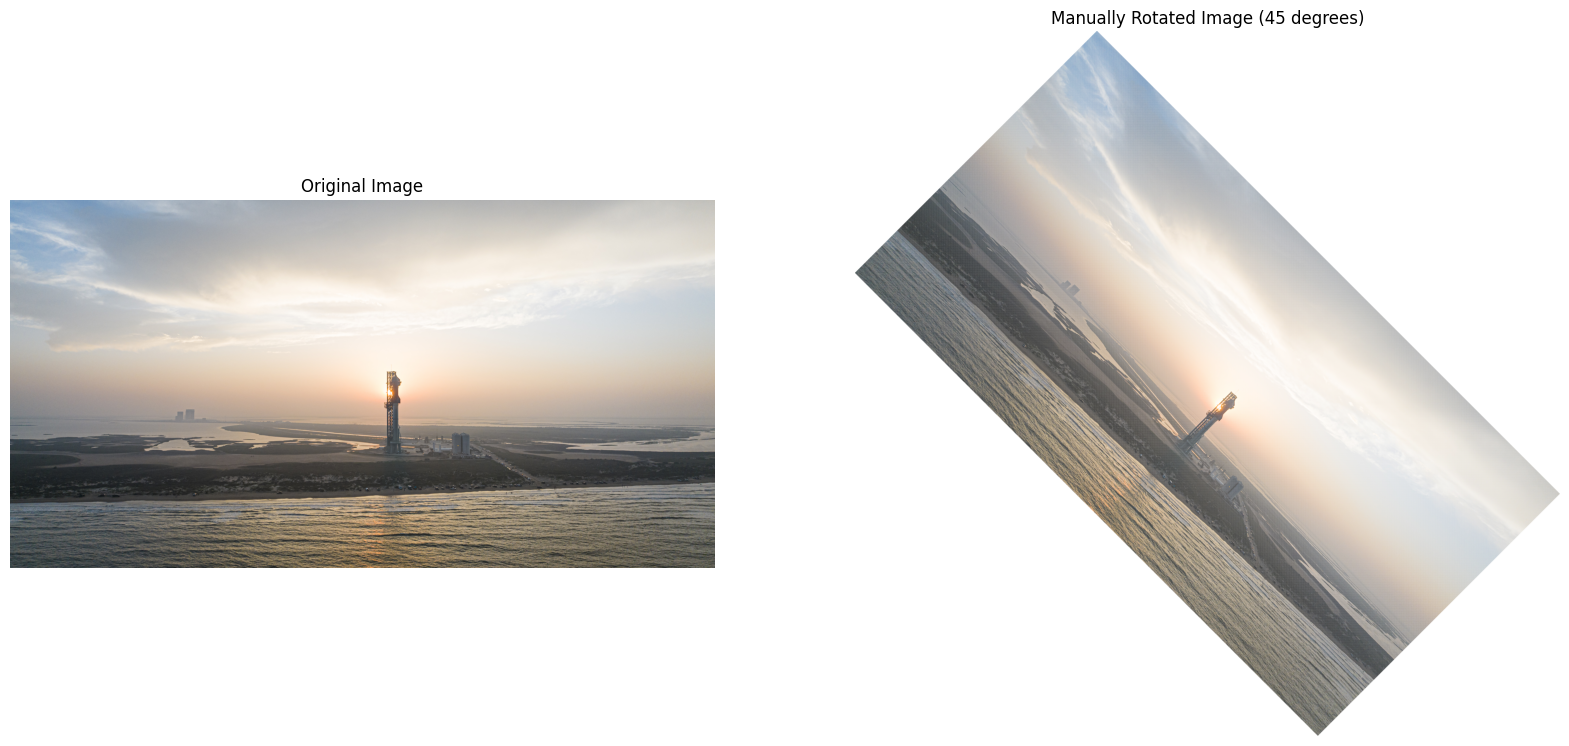

In [19]:
# Manual rotation function
def manual_rotation(image, angle):
    """
    Manually rotate the image by a given angle.
    """
    from math import radians, cos, sin
    angle_rad = radians(angle)
    width, height = image.size
    new_width = int(abs(width * cos(angle_rad)) + abs(height * sin(angle_rad)))
    new_height = int(abs(width * sin(angle_rad)) + abs(height * cos(angle_rad)))
    
    rotated_image = Image.new("RGB", (new_width, new_height), (255, 255, 255))
    
    center_x, center_y = width // 2, height // 2
    new_center_x, new_center_y = new_width // 2, new_height // 2
    
    for x in range(width):
        for y in range(height):
            new_x = int((x - center_x) * cos(angle_rad) - (y - center_y) * sin(angle_rad) + new_center_x)
            new_y = int((x - center_x) * sin(angle_rad) + (y - center_y) * cos(angle_rad) + new_center_y)
            
            if 0 <= new_x < new_width and 0 <= new_y < new_height:
                rotated_image.putpixel((new_x, new_y), image.getpixel((x, y)))
    
    return rotated_image

# Example usage of manual rotation
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(Img)
plt.title("Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(manual_rotation(Img, 45))
plt.title("Manually Rotated Image (45 degrees)")
plt.axis('off')
plt.show()